
=== Bayesian Update for Breast Cancer Diagnosis ===
Prevalence (Prior P(Cancer)): 0.0100 (1.0%)
Sensitivity (True Positive Rate): 0.90
Specificity (True Negative Rate): 0.91

P(Positive | Cancer) * P(Cancer) = 0.9 * 0.01 = 0.0090
P(Positive | No Cancer) * P(No Cancer) = 0.09 * 0.9900 = 0.0891

P(Positive) = 0.0090 + 0.0891 = 0.0981

Posterior Probability P(Cancer | Positive) = 0.0090 / 0.0981 ≈ 0.0917 (9.2%)

**Conclusion:** Even with a positive mammogram, there's only a ~9.17% chance the patient actually has breast cancer due to low prevalence and false positives.


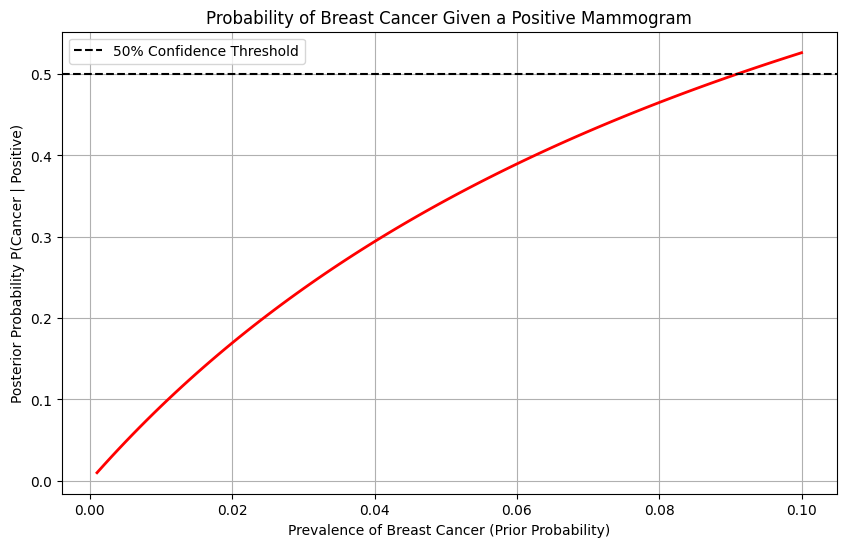

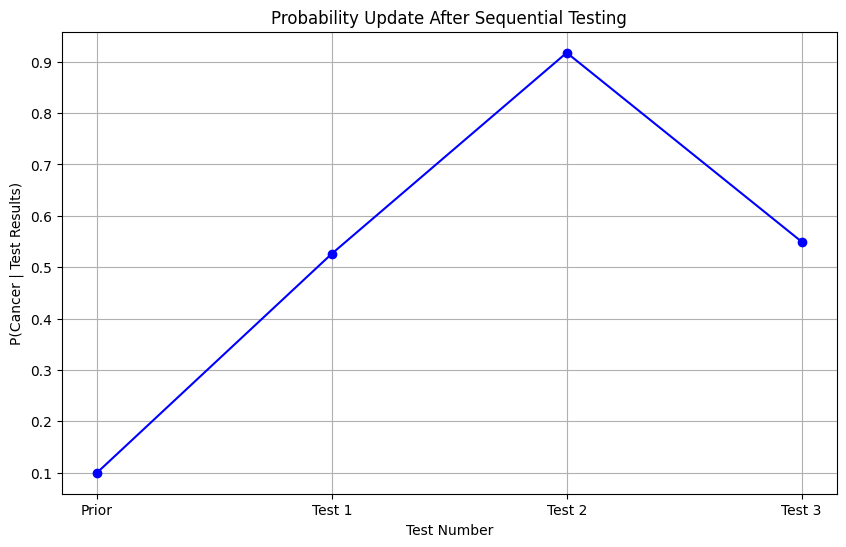

Updated probabilities after each test: ['10.00%', '52.63%', '91.74%', '54.98%']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class BayesianBreastCancerDiagnosis:
    def calculate_posterior(self, prior=None):
        """Calculate P(Cancer | Positive Mammogram) using Bayes' Theorem."""
        if prior is not None:
            self.prevalence = prior

        # P(Positive | Cancer) * P(Cancer)
        true_positives = self.sensitivity * self.prevalence

        # P(Positive | No Cancer) * P(No Cancer)
        false_positives = (1 - self.specificity) * (1 - self.prevalence)

        # P(Positive) = P(Positive | Cancer) + P(Positive | No Cancer)
        p_positive = true_positives + false_positives

        # Bayes' Theorem: P(Cancer | Positive) = P(Positive | Cancer) * P(Cancer) / P(Positive)
        posterior = true_positives / p_positive

        return posterior

# Example Usage
if __name__ == "__main__":
    diagnosis = BayesianBreastCancerDiagnosis()

    # Step-by-step Bayesian update explanation
    diagnosis.explain_bayesian_update()

    # Visualize how posterior changes with prevalence
    diagnosis.plot_posterior_vs_prevalence()

    # Sequential testing (e.g., second mammogram or biopsy)
    test_results = ['positive', 'positive', 'negative']  # Two positives, then a negative
    probabilities = diagnosis.sequential_testing(test_results)
    print(f"Updated probabilities after each test: {[f'{p*100:.2f}%' for p in probabilities]}")